In [3]:
import pandas as pd

occ_age = pd.read_csv("occupation_age.csv")

In [4]:
import pandas as pd

# Load your dataset
occ_age = pd.read_csv("occupation_age.csv")

# -----------------------
# Standardize column names
# -----------------------
occ_age.columns = (
    occ_age.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
)

# -----------------------
# Convert numeric columns
# -----------------------
numeric_cols = ["year", "age", "sex", "occ", "hwt", "serial", "cbserial"]
for col in numeric_cols:
    if col in occ_age.columns:
        occ_age[col] = pd.to_numeric(occ_age[col], errors="coerce")

# -----------------------
# Drop completely empty rows
# -----------------------
occ_age = occ_age.dropna(how="all")

# -----------------------
# Filter occupation = 800
# -----------------------
occ_800 = occ_age[occ_age["occ"] == 800]

# -----------------------
# Filter to reasonable working age group (18–65)
# -----------------------
occ_800 = occ_800[(occ_800["age"] >= 18) & (occ_800["age"] <= 65)]

# -----------------------
# Drop duplicate records
# -----------------------
occ_800 = occ_800.drop_duplicates()

print("Final shape:", occ_800.shape)
occ_800.head()


Final shape: (212854, 13)


,year,sample,serial,cbserial,hhwt,cluster,strata,gq,pernum,perwt,sex,age,occ
640,2013,201301,296,19027,7.0,2013000002961,80001,1,1,7.0,2,29,800
1019,2013,201301,477,32173,23.0,2013000004771,250001,1,1,22.0,1,36,800
1150,2013,201301,529,36068,76.0,2013000005291,270201,1,1,76.0,2,63,800
1350,2013,201301,623,41625,61.0,2013000006231,70001,1,1,62.0,1,57,800
1351,2013,201301,624,41649,17.0,2013000006241,50001,1,1,18.0,2,33,800


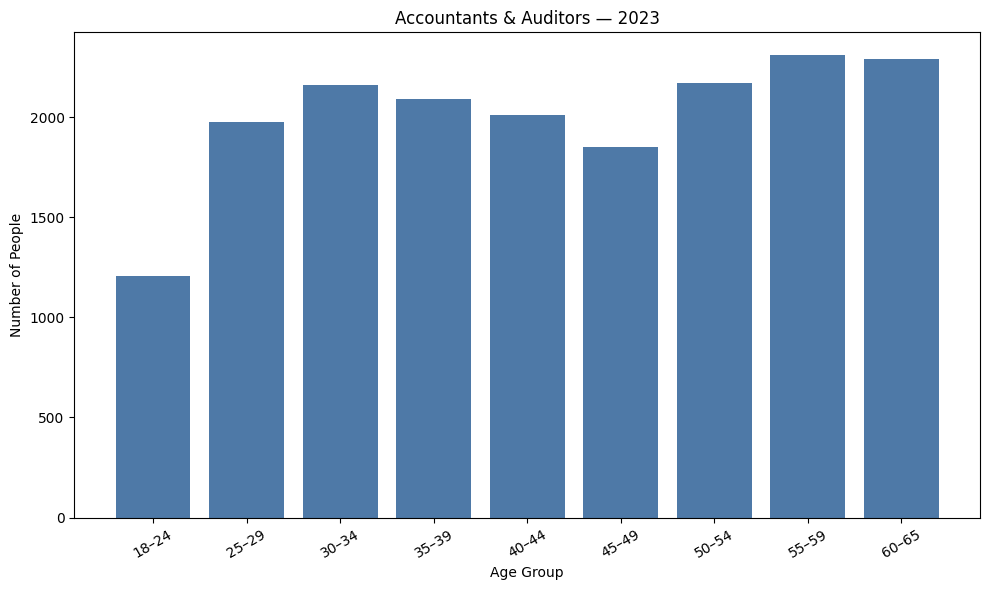

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
occ_age = pd.read_csv("occupation_age.csv")

# Standardize column names
occ_age.columns = (
    occ_age.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
)

# Filter to accountants & auditors (OCC=800)
occ_800 = occ_age[occ_age["occ"] == 800]

# Filter to 2023 only
occ_800_2023 = occ_800[occ_800["year"] == 2023]

# Workforce age range
occ_800_2023 = occ_800_2023[
    (occ_800_2023["age"] >= 18) &
    (occ_800_2023["age"] <= 65)
]

# Age bins
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ["18–24","25–29","30–34","35–39","40–44","45–49","50–54","55–59","60–65"]

occ_800_2023["age_group"] = pd.cut(occ_800_2023["age"], bins=bins, labels=labels)

# Count age groups
age_counts = occ_800_2023["age_group"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
plt.bar(age_counts.index, age_counts.values, color="#4E79A7")

plt.title("Accountants & Auditors — 2023")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


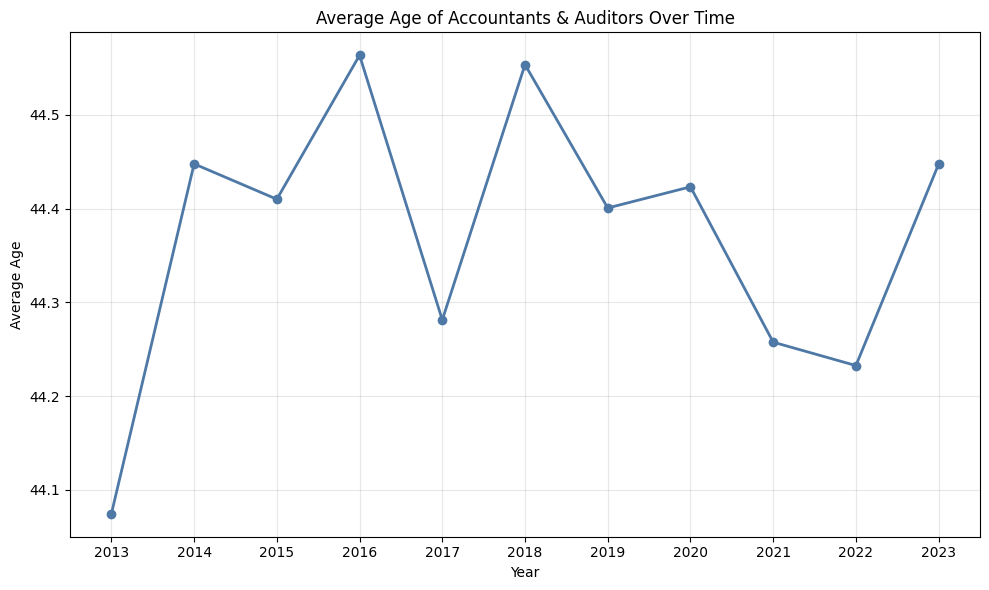

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
occ_age = pd.read_csv("occupation_age.csv")

# Standardize column names
occ_age.columns = (
    occ_age.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
)

# Filter to accountants & auditors
occ_800 = occ_age[occ_age["occ"] == 800]

# Filter workforce ages
occ_800 = occ_800[
    (occ_800["age"] >= 18) &
    (occ_800["age"] <= 65)
]

# Compute average age per year (unweighted)
avg_age_year = (
    occ_800.groupby("year")["age"]
           .mean()
           .reset_index(name="avg_age")
)

# Plot
plt.figure(figsize=(10,6))
plt.plot(avg_age_year["year"], avg_age_year["avg_age"], marker="o", linewidth=2, color="#4E79A7")

plt.title("Average Age of Accountants & Auditors Over Time")
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.grid(alpha=0.3)
plt.xticks(avg_age_year["year"])  # show every year on axis

plt.tight_layout()
plt.show()




/var/folders/7r/jdy_46yn31v2505350ttjpym0000gn/T/ipykernel_8568/2514054233.py:31: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g["age"] * g["hhwt"]).sum() / g["hhwt"].sum())


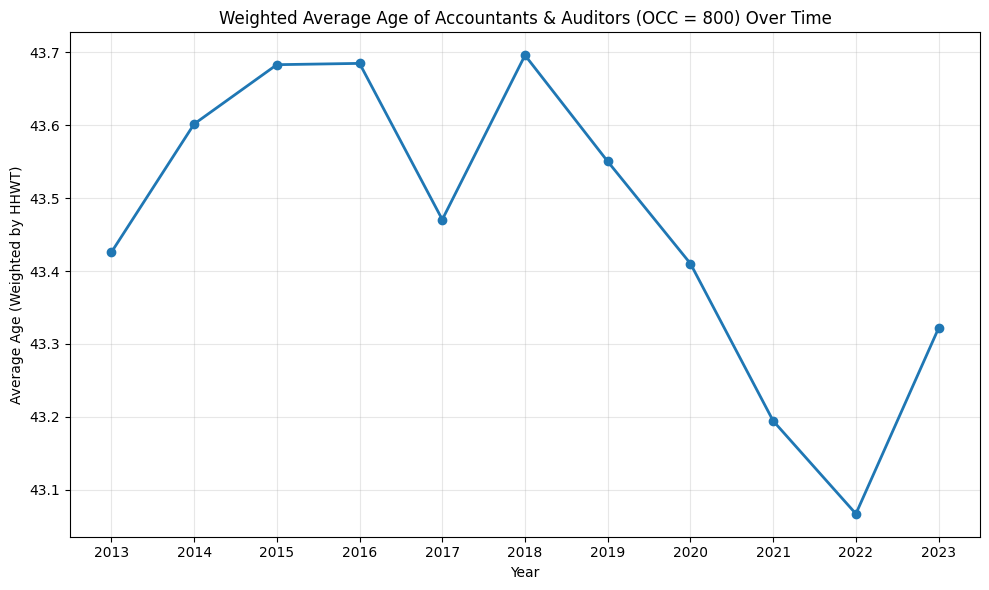

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
occ_age = pd.read_csv("occupation_age.csv")

# Standardize column names
occ_age.columns = (
    occ_age.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
)

# Filter to accountants & auditors (OCC = 800)
occ_800 = occ_age[occ_age["occ"] == 800]

# Workforce ages
occ_800 = occ_800[(occ_800["age"] >= 18) & (occ_800["age"] <= 65)]

# Make sure age and hhwt are numeric
occ_800["age"] = pd.to_numeric(occ_800["age"], errors="coerce")
occ_800["hhwt"] = pd.to_numeric(occ_800["hhwt"], errors="coerce")

# -----------------------------
# Weighted average age by year
# -----------------------------
avg_age_weighted = (
    occ_800.groupby("year")
           .apply(lambda g: (g["age"] * g["hhwt"]).sum() / g["hhwt"].sum())
           .reset_index(name="avg_age_weighted")
)

# -----------------------------
# Plot weighted trend line
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(
    avg_age_weighted["year"],
    avg_age_weighted["avg_age_weighted"],
    marker="o",
    linewidth=2
)

plt.title("Weighted Average Age of Accountants & Auditors (OCC = 800) Over Time")
plt.xlabel("Year")
plt.ylabel("Average Age (Weighted by HHWT)")
plt.grid(alpha=0.3)
plt.xticks(avg_age_weighted["year"])  # one tick per year
plt.tight_layout()
plt.show()


/var/folders/7r/jdy_46yn31v2505350ttjpym0000gn/T/ipykernel_8568/3160042280.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occ_800_2023.groupby(["age_group", "sex_label"])


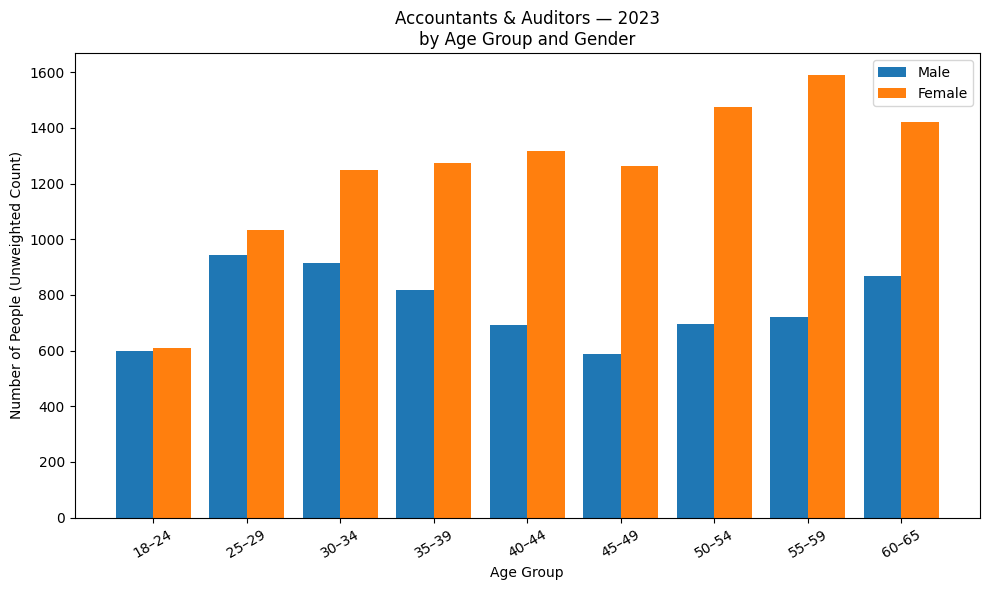

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Load and standardize
# -------------------------
occ_age = pd.read_csv("occupation_age.csv")

occ_age.columns = (
    occ_age.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
)

# -------------------------
# Filter: OCC = 800 (accountants & auditors), year 2023, ages 18–65
# -------------------------
occ_800_2023 = occ_age[
    (occ_age["occ"] == 800) &
    (occ_age["year"] == 2023) &
    (occ_age["age"] >= 18) &
    (occ_age["age"] <= 65)
].copy()

# -------------------------
# Recode sex to labels (IPUMS: 1=Male, 2=Female)
# -------------------------
sex_map = {1: "Male", 2: "Female"}
occ_800_2023["sex_label"] = occ_800_2023["sex"].map(sex_map)

# -------------------------
# Create age groups
# -------------------------
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ["18–24","25–29","30–34","35–39","40–44","45–49","50–54","55–59","60–65"]

occ_800_2023["age_group"] = pd.cut(occ_800_2023["age"], bins=bins, labels=labels)

# -------------------------
# Count by age group and sex
# -------------------------
age_sex_counts = (
    occ_800_2023.groupby(["age_group", "sex_label"])
                .size()
                .unstack(fill_value=0)
                .reindex(labels)   # ensure correct age order
)

# -------------------------
# Plot side-by-side bars
# -------------------------
x = np.arange(len(age_sex_counts.index))
width = 0.4

plt.figure(figsize=(10, 6))

plt.bar(x - width/2, age_sex_counts["Male"],  width=width, label="Male")
plt.bar(x + width/2, age_sex_counts["Female"], width=width, label="Female")

plt.title("Accountants & Auditors — 2023\nby Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of People (Unweighted Count)")
plt.xticks(x, age_sex_counts.index, rotation=30)
plt.legend()

plt.tight_layout()
plt.show()
